In [1]:
from data import *
build_dataset("D:/duels_question_1.csv", 224, "D:/Sample_web_green", "D:/Comparison_1_test", 0.2, 0.2)

Saving as .npy
D:/duels_question_1.csv
Creating inputs from csv ...
Done
Saving test set ...
Done
Saving train set ...
Done
Converting to .tfrecords
Done


In [1]:
import tensorflow as tf
from Model_comparisons import *
dataset_val = tf.data.TFRecordDataset('D:/Comparison_1/data_val.tfrecord')
dataset_train = tf.data.TFRecordDataset('D:/Comparison_1/data_train.tfrecord')

batch_size = 6

dataset_train = dataset_train.map(map_fn)
dataset_train = dataset_train.shuffle(2048, reshuffle_each_iteration = True)
dataset_train = dataset_train.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_train = dataset_train.batch(batch_size)

dataset_val = dataset_val.map(map_fn)
dataset_val = dataset_val.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_val = dataset_val.batch(batch_size)

In [2]:
conv_model = ranking_model(224)
#conv_model = load_model("D:/acc_checkpoint") #Or load in from a checkpoint

history = conv_model.fit(dataset_train, validation_data = dataset_val, epochs = 5)

Epoch 1/5


c:\users\lmacl\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:588: UserWarning: Input dict contained keys ['data_label'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


487/487 [==============================] - 168s 332ms/step - loss: 1.0383 - accuracy: 0.6257 - val_loss: 1.2281 - val_accuracy: 0.6689
Epoch 2/5
487/487 [==============================] - 159s 324ms/step - loss: 0.9420 - accuracy: 0.6455 - val_loss: 1.8021 - val_accuracy: 0.7264
Epoch 3/5
487/487 [==============================] - 159s 324ms/step - loss: 0.8086 - accuracy: 0.6781 - val_loss: 0.7184 - val_accuracy: 0.7620
Epoch 4/5
487/487 [==============================] - 158s 323ms/step - loss: 0.8248 - accuracy: 0.6712 - val_loss: 0.8409 - val_accuracy: 0.7770
Epoch 5/5
487/487 [==============================] - 158s 323ms/step - loss: 0.7757 - accuracy: 0.6812 - val_loss: 0.6851 - val_accuracy: 0.6826


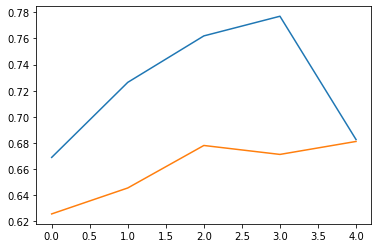

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

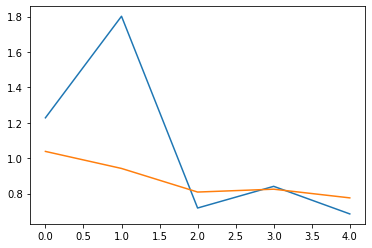

In [4]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [5]:
conv_model.save("D:/ranking_model.h5")

In [6]:
from Mapillary import *
api = Mapillary('MLY|4459801330748375|f17ddc8a7adbcbff6eea96b1cf4c2aad',
                [-75.9216253, 45.2157973], [-75.4695785, 45.4958371])

In [ ]:
await api.generate_csv(conv_model, "D:/test.csv")

 Processing image 12976 | -75.85314720783 45.4778930468482